In [0]:
# Importing Keras and other utilities. Along with Fashion MNIST

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [157]:
#Initial Lengths of All Data
print("-------- Initial Dimensions --------")
print("Length of Training Images = " + str(train_images.shape))
print("Length of Training Labels = " + str(train_labels.shape))
print("Length of Test Images = " + str(test_images.shape))
print("Length of Test Labels = " + str(test_labels.shape))

#Splitting Training Data in to 40k training and 20k validation

temporary = list(zip(train_images, train_labels))
np.random.shuffle(temporary)

new_train_images,  new_train_label   = zip(*temporary[:40000])
validation_images, validation_label = zip(*temporary[40000:])

new_train_images  = np.array(new_train_images)
new_train_label   = np.array(new_train_label)
validation_images = np.array(validation_images)
validation_label  = np.array(validation_label)

#Final Lengths of All Data
print("\n-------- Final Dimensions --------")
print("Length of Training Images = " + str(new_train_images.shape))
print("Length of Training Labels = " + str(new_train_label.shape))
print("Length of Validation Images = " + str(validation_images.shape))
print("Length of Validation Labels = " + str(validation_label.shape))
print("Length of Test Images = " + str(test_images.shape))
print("Length of Test Labels = " + str(test_labels.shape))

#Reshaping the training and validation data for the network
new_train_images = new_train_images.reshape(40000, 784)
new_train_images = new_train_images.astype('float32') / 255

validation_images = validation_images.reshape(20000, 784)
validation_images = validation_images.astype('float32') / 255

train_images = train_images.reshape(60000, 784)
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(10000, 784)
test_images = test_images.astype('float32') / 255

-------- Initial Dimensions --------
Length of Training Images = (60000, 28, 28)
Length of Training Labels = (60000,)
Length of Test Images = (10000, 28, 28)
Length of Test Labels = (10000,)

-------- Final Dimensions --------
Length of Training Images = (40000, 28, 28)
Length of Training Labels = (40000,)
Length of Validation Images = (20000, 28, 28)
Length of Validation Labels = (20000,)
Length of Test Images = (10000, 28, 28)
Length of Test Labels = (10000,)


### Q) Train four neural networks each with one hidden layer: 
1. One with 16 nodes
2. One with 64 nodes
3. One with 128 nodes 
4. One with 512 nodes.

Train each one of them for 15 epochs.

Epoch 1/15
40000/40000 [==============================] - 3s 68us/step - loss: 0.6168 - acc: 0.7867
Epoch 2/15
40000/40000 [==============================] - 2s 47us/step - loss: 0.4729 - acc: 0.8368
Epoch 3/15
40000/40000 [==============================] - 2s 47us/step - loss: 0.4465 - acc: 0.8454
Epoch 4/15
40000/40000 [==============================] - 2s 47us/step - loss: 0.4342 - acc: 0.8500
Epoch 5/15
40000/40000 [==============================] - 2s 47us/step - loss: 0.4241 - acc: 0.8518
Epoch 6/15
40000/40000 [==============================] - 2s 47us/step - loss: 0.4184 - acc: 0.8539
Epoch 7/15
40000/40000 [==============================] - 2s 47us/step - loss: 0.4123 - acc: 0.8565
Epoch 8/15
40000/40000 [==============================] - 2s 47us/step - loss: 0.4081 - acc: 0.8575
Epoch 9/15
40000/40000 [==============================] - 2s 47us/step - loss: 0.4048 - acc: 0.8604
Epoch 10/15
40000/40000 [==============================] - 2s 48us/step - loss: 0.4024 - acc: 0.8591

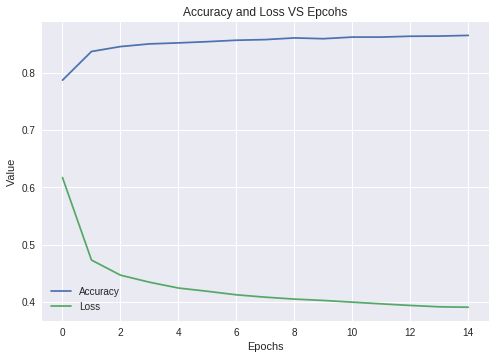

In [128]:
# Training neural network: Hidden layer with 16 nodes and 15 epochs

model_16_15 = Sequential()
model_16_15.add(Dense(16, input_dim=784))
model_16_15.add(Dense(10, activation='softmax'))
model_16_15.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_16_15 = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_16_15 = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_16_15 = model_16_15.fit(new_train_images, data_label_16_15, epochs=15)

# Testing on validation data
test_loss_16_15, test_acc_16_15 = model_16_15.evaluate(validation_images, vali_label_16_15)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_16_15))
print("Test Accuracy = " + str(test_acc_16_15))
print('\n\n')

plt.figure(1)
plt.plot(training_16_15.history['acc'], label="Accuracy")
plt.plot(training_16_15.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epcohs')
plt.legend()

Epoch 1/15
40000/40000 [==============================] - 3s 82us/step - loss: 0.6026 - acc: 0.7924
Epoch 2/15
40000/40000 [==============================] - 2s 58us/step - loss: 0.4779 - acc: 0.8336
Epoch 3/15
40000/40000 [==============================] - 2s 58us/step - loss: 0.4512 - acc: 0.8427
Epoch 4/15
40000/40000 [==============================] - 2s 59us/step - loss: 0.4397 - acc: 0.8469
Epoch 5/15
40000/40000 [==============================] - 2s 59us/step - loss: 0.4303 - acc: 0.8504
Epoch 6/15
40000/40000 [==============================] - 2s 59us/step - loss: 0.4224 - acc: 0.8540
Epoch 7/15
40000/40000 [==============================] - 2s 60us/step - loss: 0.4172 - acc: 0.8556
Epoch 8/15
40000/40000 [==============================] - 2s 59us/step - loss: 0.4130 - acc: 0.8556
Epoch 9/15
40000/40000 [==============================] - 2s 58us/step - loss: 0.4084 - acc: 0.8584
Epoch 10/15
40000/40000 [==============================] - 2s 59us/step - loss: 0.4058 - acc: 0.8592

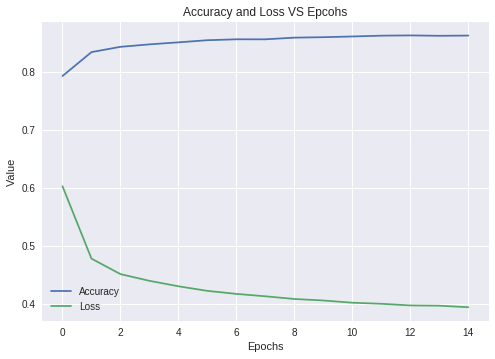

In [129]:
# Training neural network: Hidden layer with 64 nodes and 15 epochs

model_64_15 = Sequential()
model_64_15.add(Dense(64, input_dim=784))
model_64_15.add(Dense(10, activation='softmax'))
model_64_15.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_64_15 = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_64_15 = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_64_15 = model_64_15.fit(new_train_images, data_label_64_15, epochs=15)

# Testing on validation data
test_loss_64_15, test_acc_64_15 = model_64_15.evaluate(validation_images, vali_label_64_15)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_64_15))
print("Test Accuracy = " + str(test_acc_64_15))
print('\n\n')

plt.figure(2)
plt.plot(training_64_15.history['acc'], label="Accuracy")
plt.plot(training_64_15.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epcohs')
plt.legend()

Epoch 1/15
40000/40000 [==============================] - 5s 123us/step - loss: 0.6099 - acc: 0.7915
Epoch 2/15
40000/40000 [==============================] - 4s 99us/step - loss: 0.4846 - acc: 0.8332
Epoch 3/15
40000/40000 [==============================] - 4s 99us/step - loss: 0.4579 - acc: 0.8401
Epoch 4/15
40000/40000 [==============================] - 4s 100us/step - loss: 0.4438 - acc: 0.8451
Epoch 5/15
40000/40000 [==============================] - 4s 98us/step - loss: 0.4352 - acc: 0.8502
Epoch 6/15
40000/40000 [==============================] - 4s 100us/step - loss: 0.4272 - acc: 0.8511
Epoch 7/15
40000/40000 [==============================] - 4s 97us/step - loss: 0.4198 - acc: 0.8542
Epoch 8/15
40000/40000 [==============================] - 4s 98us/step - loss: 0.4186 - acc: 0.8549
Epoch 9/15
40000/40000 [==============================] - 4s 101us/step - loss: 0.4133 - acc: 0.8561
Epoch 10/15
40000/40000 [==============================] - 4s 98us/step - loss: 0.4110 - acc: 0.

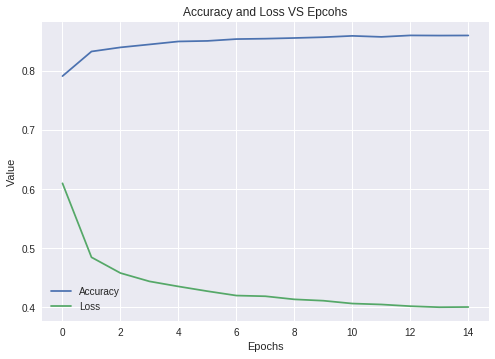

In [131]:
# Training neural network: Hidden layer with 128 nodes and 15 epochs

model_128_15 = Sequential()
model_128_15.add(Dense(128, input_dim=784))
model_128_15.add(Dense(10, activation='softmax'))
model_128_15.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_128_15 = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_128_15 = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_128_15 = model_128_15.fit(new_train_images, data_label_128_15, epochs=15)

# Testing on validation data
test_loss_128_15, test_acc_128_15 = model_128_15.evaluate(validation_images, vali_label_128_15)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_128_15))
print("Test Accuracy = " + str(test_acc_128_15))
print('\n\n')

plt.figure(3)
plt.plot(training_128_15.history['acc'], label="Accuracy")
plt.plot(training_128_15.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epcohs')
plt.legend()

Epoch 1/15
40000/40000 [==============================] - 9s 234us/step - loss: 0.6827 - acc: 0.7785
Epoch 2/15
40000/40000 [==============================] - 8s 202us/step - loss: 0.5056 - acc: 0.8248
Epoch 3/15
40000/40000 [==============================] - 8s 199us/step - loss: 0.4769 - acc: 0.8345
Epoch 4/15
40000/40000 [==============================] - 8s 197us/step - loss: 0.4598 - acc: 0.8410
Epoch 5/15
40000/40000 [==============================] - 8s 194us/step - loss: 0.4504 - acc: 0.8431
Epoch 6/15
40000/40000 [==============================] - 8s 203us/step - loss: 0.4405 - acc: 0.8471
Epoch 7/15
40000/40000 [==============================] - 8s 204us/step - loss: 0.4370 - acc: 0.8480
Epoch 8/15
40000/40000 [==============================] - 8s 206us/step - loss: 0.4327 - acc: 0.8498
Epoch 9/15
40000/40000 [==============================] - 8s 202us/step - loss: 0.4292 - acc: 0.8531
Epoch 10/15
40000/40000 [==============================] - 8s 200us/step - loss: 0.4272 - a

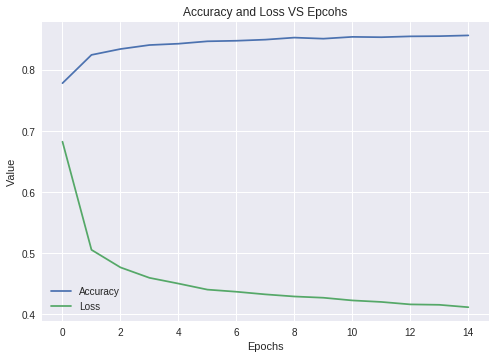

In [132]:
# Training neural network: Hidden layer with 512 nodes and 15 epochs

model_512_15 = Sequential()
model_512_15.add(Dense(512, input_dim=784))
model_512_15.add(Dense(10, activation='softmax'))
model_512_15.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_512_15 = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_512_15 = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_512_15 = model_512_15.fit(new_train_images, data_label_512_15, epochs=15)

# Testing on validation data
test_loss_512_15, test_acc_512_15 = model_512_15.evaluate(validation_images, vali_label_512_15)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_512_15))
print("Test Accuracy = " + str(test_acc_512_15))
print('\n\n')

plt.figure(4)
plt.plot(training_512_15.history['acc'], label="Accuracy")
plt.plot(training_512_15.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epcohs')
plt.legend()

### Q) Which one of them gives you the best performance on the validation data?

When we have 15 epochs the best result is from the network that has hidden layer with **16 nodes and 15 epochs**

### Repeating with 30 Epochs

Epoch 1/30
40000/40000 [==============================] - 3s 75us/step - loss: 0.6210 - acc: 0.7856
Epoch 2/30
40000/40000 [==============================] - 2s 48us/step - loss: 0.4764 - acc: 0.8360
Epoch 3/30
40000/40000 [==============================] - 2s 48us/step - loss: 0.4498 - acc: 0.8450
Epoch 4/30
40000/40000 [==============================] - 2s 49us/step - loss: 0.4336 - acc: 0.8511
Epoch 5/30
40000/40000 [==============================] - 2s 48us/step - loss: 0.4258 - acc: 0.8532
Epoch 6/30
40000/40000 [==============================] - 2s 48us/step - loss: 0.4184 - acc: 0.8545
Epoch 7/30
40000/40000 [==============================] - 2s 48us/step - loss: 0.4138 - acc: 0.8572
Epoch 8/30
40000/40000 [==============================] - 2s 48us/step - loss: 0.4094 - acc: 0.8592
Epoch 9/30
40000/40000 [==============================] - 2s 48us/step - loss: 0.4047 - acc: 0.8597
Epoch 10/30
40000/40000 [==============================] - 2s 48us/step - loss: 0.4030 - acc: 0.8591

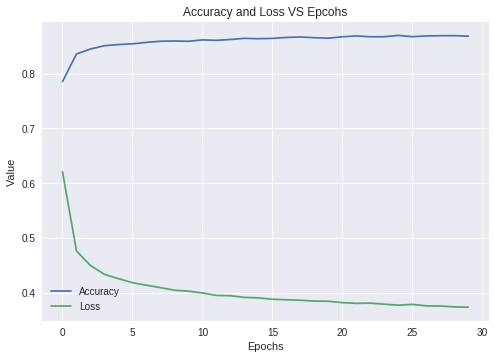

In [133]:
# Training neural network: Hidden layer with 16 nodes and 30 epochs

model_16_30 = Sequential()
model_16_30.add(Dense(16, input_dim=784))
model_16_30.add(Dense(10, activation='softmax'))
model_16_30.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_16_30 = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_16_30 = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_16_30 = model_16_30.fit(new_train_images, data_label_16_30, epochs=30)

# Testing on validation data
test_loss_16_30, test_acc_16_30 = model_16_30.evaluate(validation_images, vali_label_16_30)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_16_30))
print("Test Accuracy = " + str(test_acc_16_30))
print('\n\n')

plt.figure(5)
plt.plot(training_16_30.history['acc'], label="Accuracy")
plt.plot(training_16_30.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epcohs')
plt.legend()

Epoch 1/30
40000/40000 [==============================] - 3s 87us/step - loss: 0.5976 - acc: 0.7927
Epoch 2/30
40000/40000 [==============================] - 2s 60us/step - loss: 0.4764 - acc: 0.8360
Epoch 3/30
40000/40000 [==============================] - 2s 60us/step - loss: 0.4533 - acc: 0.8413
Epoch 4/30
40000/40000 [==============================] - 2s 60us/step - loss: 0.4379 - acc: 0.8452
Epoch 5/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.4292 - acc: 0.8526
Epoch 6/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.4231 - acc: 0.8542
Epoch 7/30
40000/40000 [==============================] - 2s 60us/step - loss: 0.4160 - acc: 0.8543
Epoch 8/30
40000/40000 [==============================] - 2s 60us/step - loss: 0.4131 - acc: 0.8561
Epoch 9/30
40000/40000 [==============================] - 2s 60us/step - loss: 0.4094 - acc: 0.8580
Epoch 10/30
40000/40000 [==============================] - 2s 60us/step - loss: 0.4058 - acc: 0.8589

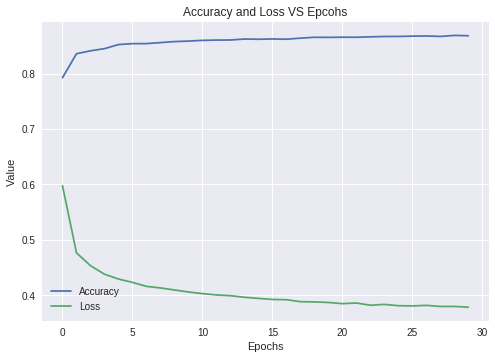

In [134]:
# Training neural network: Hidden layer with 64 nodes and 30 epochs

model_64_30 = Sequential()
model_64_30.add(Dense(64, input_dim=784))
model_64_30.add(Dense(10, activation='softmax'))
model_64_30.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_64_30 = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_64_30 = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_64_30 = model_64_30.fit(new_train_images, data_label_64_30, epochs=30)

# Testing on validation data
test_loss_64_30, test_acc_64_30 = model_64_30.evaluate(validation_images, vali_label_64_30)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_64_30))
print("Test Accuracy = " + str(test_acc_64_30))
print('\n\n')

plt.figure(6)
plt.plot(training_64_30.history['acc'], label="Accuracy")
plt.plot(training_64_30.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epcohs')
plt.legend()

Epoch 1/30
40000/40000 [==============================] - 5s 132us/step - loss: 0.6217 - acc: 0.7875
Epoch 2/30
40000/40000 [==============================] - 4s 105us/step - loss: 0.4855 - acc: 0.8321
Epoch 3/30
40000/40000 [==============================] - 4s 104us/step - loss: 0.4590 - acc: 0.8404
Epoch 4/30
40000/40000 [==============================] - 4s 101us/step - loss: 0.4453 - acc: 0.8458
Epoch 5/30
40000/40000 [==============================] - 4s 101us/step - loss: 0.4347 - acc: 0.8499
Epoch 6/30
40000/40000 [==============================] - 4s 102us/step - loss: 0.4272 - acc: 0.8517
Epoch 7/30
40000/40000 [==============================] - 4s 102us/step - loss: 0.4226 - acc: 0.8524
Epoch 8/30
40000/40000 [==============================] - 4s 102us/step - loss: 0.4176 - acc: 0.8557
Epoch 9/30
40000/40000 [==============================] - 4s 104us/step - loss: 0.4121 - acc: 0.8568
Epoch 10/30
40000/40000 [==============================] - 4s 105us/step - loss: 0.4108 - a

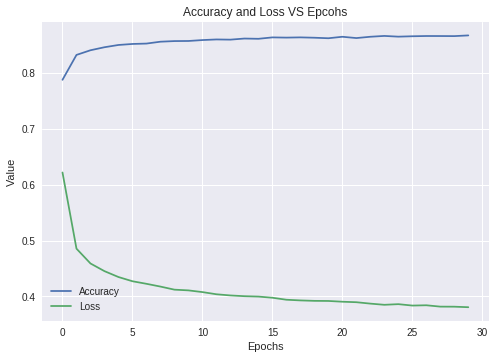

In [135]:
# Training neural network: Hidden layer with 128 nodes and 30 epochs

model_128_30 = Sequential()
model_128_30.add(Dense(128, input_dim=784))
model_128_30.add(Dense(10, activation='softmax'))
model_128_30.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_128_30 = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_128_30 = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_128_30 = model_128_30.fit(new_train_images, data_label_128_30, epochs=30)

# Testing on validation data
test_loss_128_30, test_acc_128_30 = model_128_30.evaluate(validation_images, vali_label_128_30)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_128_30))
print("Test Accuracy = " + str(test_acc_128_30))
print('\n\n')

plt.figure(7)
plt.plot(training_128_30.history['acc'], label="Accuracy")
plt.plot(training_128_30.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epcohs')
plt.legend()

Epoch 1/30
40000/40000 [==============================] - 10s 248us/step - loss: 0.6832 - acc: 0.7766
Epoch 2/30
40000/40000 [==============================] - 8s 211us/step - loss: 0.5061 - acc: 0.8263
Epoch 3/30
40000/40000 [==============================] - 9s 213us/step - loss: 0.4768 - acc: 0.8341
Epoch 4/30
40000/40000 [==============================] - 9s 217us/step - loss: 0.4627 - acc: 0.8397
Epoch 5/30
40000/40000 [==============================] - 9s 217us/step - loss: 0.4517 - acc: 0.8426
Epoch 6/30
40000/40000 [==============================] - 9s 215us/step - loss: 0.4422 - acc: 0.8481
Epoch 7/30
40000/40000 [==============================] - 9s 213us/step - loss: 0.4370 - acc: 0.8482
Epoch 8/30
40000/40000 [==============================] - 9s 215us/step - loss: 0.4330 - acc: 0.8491
Epoch 9/30
40000/40000 [==============================] - 9s 215us/step - loss: 0.4280 - acc: 0.8517
Epoch 10/30
40000/40000 [==============================] - 9s 213us/step - loss: 0.4254 - 

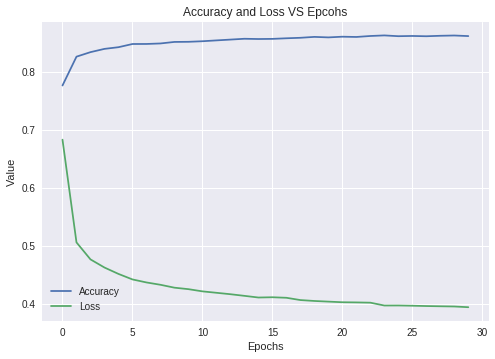

In [136]:
# Training neural network: Hidden layer with 512 nodes and 30 epochs

model_512_30 = Sequential()
model_512_30.add(Dense(512, input_dim=784))
model_512_30.add(Dense(10, activation='softmax'))
model_512_30.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_512_30 = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_512_30 = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_512_30 = model_512_30.fit(new_train_images, data_label_512_30, epochs=30)

# Testing on validation data
test_loss_512_30, test_acc_512_30 = model_512_30.evaluate(validation_images, vali_label_512_30)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_512_30))
print("Test Accuracy = " + str(test_acc_512_30))
print('\n\n')

plt.figure(8)
plt.plot(training_512_30.history['acc'], label="Accuracy")
plt.plot(training_512_30.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epcohs')
plt.legend()

### Q) Does increasing epoch to 30 improve the validation performance?

*For 16 Neurons:*

*   The test accuracy decreased by 0.00225
*   The test loss increased by 0.00432545667

For 16 neurons it did not really improve the validation performance.

*For 64 Neurons:*

*   The test accuracy decreased by 0.0086
*   The test loss increased by 0.0338353184

For 64 neurons it did not really improve the validation performance.


*For 128 Neurons:*

*   The test accuracy increased by 0.00475
*   The test loss decreased by 0.00648806181

For 32 neurons it improved the validation performance.

*For 512 Neurons:*

*   The test accuracy increased by 0.0073
*   The test loss decreased by -0.0253319392

For 512 neurons it improved the validation performance.

```

```
Overall, if there is a large number of neurons then the validation performance increases at 30 epochs. For a small number of neurons, increasing the epochs made it worse.






### Q) Experiment with using sigmoid and relu as activation functions for the hidden layer. Plot the validation loss or validation accuracy for both kinds of activation functions for all the four network models against the number of epochs (30). This will give you 8 plots. Comment on the plots and comparison across the choice of activation functions

Epoch 1/30
40000/40000 [==============================] - 3s 80us/step - loss: 0.6648 - acc: 0.7749
Epoch 2/30
40000/40000 [==============================] - 2s 49us/step - loss: 0.4731 - acc: 0.8325
Epoch 3/30
40000/40000 [==============================] - 2s 49us/step - loss: 0.4378 - acc: 0.8478
Epoch 4/30
40000/40000 [==============================] - 2s 50us/step - loss: 0.4175 - acc: 0.8565
Epoch 5/30
40000/40000 [==============================] - 2s 49us/step - loss: 0.4039 - acc: 0.8591
Epoch 6/30
40000/40000 [==============================] - 2s 49us/step - loss: 0.3917 - acc: 0.8628
Epoch 7/30
40000/40000 [==============================] - 2s 50us/step - loss: 0.3828 - acc: 0.8663
Epoch 8/30
40000/40000 [==============================] - 2s 49us/step - loss: 0.3762 - acc: 0.8704
Epoch 9/30
40000/40000 [==============================] - 2s 50us/step - loss: 0.3715 - acc: 0.8705
Epoch 10/30
40000/40000 [==============================] - 2s 50us/step - loss: 0.3654 - acc: 0.8728

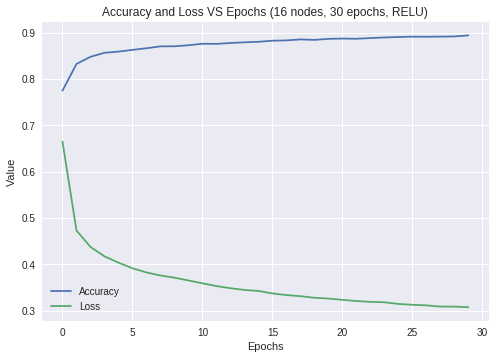

In [137]:
# Training neural network: Hidden layer with 16 nodes and 30 epochs and RELU

model_16_30_RELU = Sequential()
model_16_30_RELU.add(Dense(16, activation='relu', input_dim=784))
model_16_30_RELU.add(Dense(10, activation='softmax'))
model_16_30_RELU.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_16_30_RELU = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_16_30_RELU = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_16_30_RELU = model_16_30_RELU.fit(new_train_images, data_label_16_30_RELU, epochs=30)

# Testing on validation data
test_loss_16_30_RELU, test_acc_16_30_RELU = model_16_30_RELU.evaluate(validation_images, vali_label_16_30_RELU)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_16_30_RELU))
print("Test Accuracy = " + str(test_acc_16_30_RELU))
print('\n\n')

plt.figure(9)
plt.plot(training_16_30_RELU.history['acc'], label="Accuracy")
plt.plot(training_16_30_RELU.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epochs (16 nodes, 30 epochs, RELU)')
plt.legend()

Epoch 1/30
40000/40000 [==============================] - 3s 81us/step - loss: 0.9239 - acc: 0.7447
Epoch 2/30
40000/40000 [==============================] - 2s 50us/step - loss: 0.5168 - acc: 0.8249
Epoch 3/30
40000/40000 [==============================] - 2s 50us/step - loss: 0.4535 - acc: 0.8426
Epoch 4/30
40000/40000 [==============================] - 2s 50us/step - loss: 0.4242 - acc: 0.8515
Epoch 5/30
40000/40000 [==============================] - 2s 50us/step - loss: 0.4058 - acc: 0.8568
Epoch 6/30
40000/40000 [==============================] - 2s 50us/step - loss: 0.3921 - acc: 0.8617
Epoch 7/30
40000/40000 [==============================] - 2s 49us/step - loss: 0.3818 - acc: 0.8649
Epoch 8/30
40000/40000 [==============================] - 2s 50us/step - loss: 0.3736 - acc: 0.8677
Epoch 9/30
40000/40000 [==============================] - 2s 50us/step - loss: 0.3670 - acc: 0.8694
Epoch 10/30
40000/40000 [==============================] - 2s 50us/step - loss: 0.3603 - acc: 0.8708

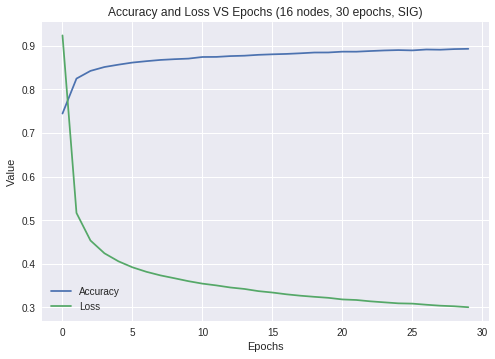

In [139]:
# Training neural network: Hidden layer with 16 nodes and 30 epochs and Sigmoid

model_16_30_SIG = Sequential()
model_16_30_SIG.add(Dense(16, activation='sigmoid', input_dim=784))
model_16_30_SIG.add(Dense(10, activation='softmax'))
model_16_30_SIG.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_16_30_SIG = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_16_30_SIG = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_16_30_SIG = model_16_30_SIG.fit(new_train_images, data_label_16_30_SIG, epochs=30)

# Testing on validation data
test_loss_16_30_SIG, test_acc_16_30_SIG = model_16_30_SIG.evaluate(validation_images, vali_label_16_30_SIG)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_16_30_SIG))
print("Test Accuracy = " + str(test_acc_16_30_SIG))
print('\n\n')

plt.figure(10)
plt.plot(training_16_30_SIG.history['acc'], label="Accuracy")
plt.plot(training_16_30_SIG.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epochs (16 nodes, 30 epochs, SIG)')
plt.legend()

Epoch 1/30
40000/40000 [==============================] - 4s 95us/step - loss: 0.5654 - acc: 0.8037
Epoch 2/30
40000/40000 [==============================] - 2s 62us/step - loss: 0.4184 - acc: 0.8546
Epoch 3/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.3754 - acc: 0.8665
Epoch 4/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.3513 - acc: 0.8741
Epoch 5/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.3322 - acc: 0.8797
Epoch 6/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.3198 - acc: 0.8864
Epoch 7/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.3089 - acc: 0.8902
Epoch 8/30
40000/40000 [==============================] - 2s 62us/step - loss: 0.2990 - acc: 0.8923
Epoch 9/30
40000/40000 [==============================] - 2s 62us/step - loss: 0.2910 - acc: 0.8958
Epoch 10/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.2845 - acc: 0.8976

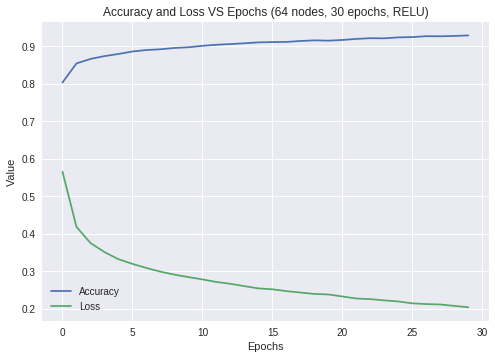

In [140]:
# Training neural network: Hidden layer with 64 nodes and 30 epochs and RELU

model_64_30_RELU = Sequential()
model_64_30_RELU.add(Dense(64, activation='relu', input_dim=784))
model_64_30_RELU.add(Dense(10, activation='softmax'))
model_64_30_RELU.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_64_30_RELU = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_64_30_RELU = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_64_30_RELU = model_64_30_RELU.fit(new_train_images, data_label_64_30_RELU, epochs=30)

# Testing on validation data
test_loss_64_30_RELU, test_acc_64_30_RELU = model_64_30_RELU.evaluate(validation_images, vali_label_64_30_RELU)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_64_30_RELU))
print("Test Accuracy = " + str(test_acc_64_30_RELU))
print('\n\n')

plt.figure(11)
plt.plot(training_64_30_RELU.history['acc'], label="Accuracy")
plt.plot(training_64_30_RELU.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epochs (64 nodes, 30 epochs, RELU)')
plt.legend()

Epoch 1/30
40000/40000 [==============================] - 4s 95us/step - loss: 0.6285 - acc: 0.7941
Epoch 2/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.4273 - acc: 0.8478
Epoch 3/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.3904 - acc: 0.8607
Epoch 4/30
40000/40000 [==============================] - 2s 61us/step - loss: 0.3669 - acc: 0.8688
Epoch 5/30
40000/40000 [==============================] - 3s 64us/step - loss: 0.3512 - acc: 0.8732
Epoch 6/30
40000/40000 [==============================] - 3s 67us/step - loss: 0.3374 - acc: 0.8783
Epoch 7/30
40000/40000 [==============================] - 3s 67us/step - loss: 0.3251 - acc: 0.8820
Epoch 8/30
40000/40000 [==============================] - 3s 67us/step - loss: 0.3160 - acc: 0.8864
Epoch 9/30
40000/40000 [==============================] - 3s 65us/step - loss: 0.3079 - acc: 0.8901
Epoch 10/30
40000/40000 [==============================] - 2s 62us/step - loss: 0.2995 - acc: 0.8910

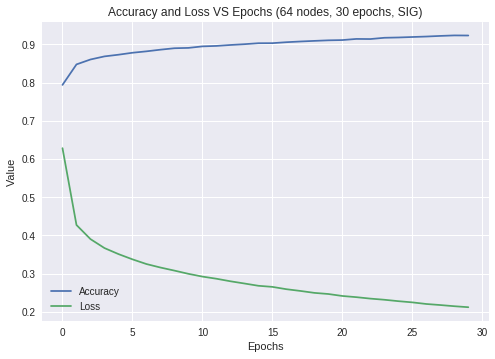

In [141]:
# Training neural network: Hidden layer with 64 nodes and 30 epochs and Sigmoid

model_64_30_SIG = Sequential()
model_64_30_SIG.add(Dense(64, activation='sigmoid', input_dim=784))
model_64_30_SIG.add(Dense(10, activation='softmax'))
model_64_30_SIG.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_64_30_SIG = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_64_30_SIG = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_64_30_SIG = model_64_30_SIG.fit(new_train_images, data_label_64_30_SIG, epochs=30)

# Testing on validation data
test_loss_64_30_SIG, test_acc_64_30_SIG = model_64_30_SIG.evaluate(validation_images, vali_label_64_30_SIG)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_64_30_SIG))
print("Test Accuracy = " + str(test_acc_64_30_SIG))
print('\n\n')

plt.figure(12)
plt.plot(training_64_30_SIG.history['acc'], label="Accuracy")
plt.plot(training_64_30_SIG.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epochs (64 nodes, 30 epochs, SIG)')
plt.legend()

Epoch 1/30
40000/40000 [==============================] - 5s 137us/step - loss: 0.5520 - acc: 0.8061
Epoch 2/30
40000/40000 [==============================] - 4s 100us/step - loss: 0.3981 - acc: 0.8561
Epoch 3/30
40000/40000 [==============================] - 4s 101us/step - loss: 0.3584 - acc: 0.8727
Epoch 4/30
40000/40000 [==============================] - 4s 101us/step - loss: 0.3346 - acc: 0.8812
Epoch 5/30
40000/40000 [==============================] - 4s 101us/step - loss: 0.3174 - acc: 0.8858
Epoch 6/30
40000/40000 [==============================] - 4s 101us/step - loss: 0.3060 - acc: 0.8906
Epoch 7/30
40000/40000 [==============================] - 4s 101us/step - loss: 0.2968 - acc: 0.8944
Epoch 8/30
40000/40000 [==============================] - 4s 100us/step - loss: 0.2879 - acc: 0.8988
Epoch 9/30
40000/40000 [==============================] - 4s 101us/step - loss: 0.2785 - acc: 0.9000
Epoch 10/30
40000/40000 [==============================] - 4s 100us/step - loss: 0.2710 - a

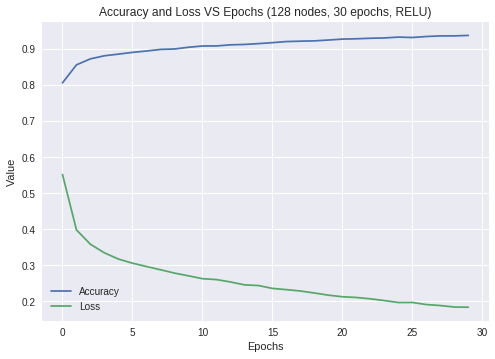

In [143]:
# Training neural network: Hidden layer with 128 nodes and 30 epochs and RELU

model_128_30_RELU = Sequential()
model_128_30_RELU.add(Dense(128, activation='relu', input_dim=784))
model_128_30_RELU.add(Dense(10, activation='softmax'))
model_128_30_RELU.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_128_30_RELU = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_128_30_RELU = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_128_30_RELU = model_128_30_RELU.fit(new_train_images, data_label_128_30_RELU, epochs=30)

# Testing on validation data
test_loss_128_30_RELU, test_acc_128_30_RELU = model_128_30_RELU.evaluate(validation_images, vali_label_128_30_RELU)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_128_30_RELU))
print("Test Accuracy = " + str(test_acc_128_30_RELU))
print('\n\n')

plt.figure(13)
plt.plot(training_128_30_RELU.history['acc'], label="Accuracy")
plt.plot(training_128_30_RELU.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epochs (128 nodes, 30 epochs, RELU)')
plt.legend()

Epoch 1/30
40000/40000 [==============================] - 6s 138us/step - loss: 0.5689 - acc: 0.8038
Epoch 2/30
40000/40000 [==============================] - 4s 102us/step - loss: 0.4114 - acc: 0.8532
Epoch 3/30
40000/40000 [==============================] - 4s 101us/step - loss: 0.3756 - acc: 0.8638
Epoch 4/30
40000/40000 [==============================] - 4s 103us/step - loss: 0.3513 - acc: 0.8735
Epoch 5/30
40000/40000 [==============================] - 4s 102us/step - loss: 0.3347 - acc: 0.8791
Epoch 6/30
40000/40000 [==============================] - 4s 104us/step - loss: 0.3192 - acc: 0.8843
Epoch 7/30
40000/40000 [==============================] - 4s 101us/step - loss: 0.3066 - acc: 0.8890
Epoch 8/30
40000/40000 [==============================] - 4s 102us/step - loss: 0.2960 - acc: 0.8920
Epoch 9/30
40000/40000 [==============================] - 4s 103us/step - loss: 0.2857 - acc: 0.8968
Epoch 10/30
40000/40000 [==============================] - 4s 102us/step - loss: 0.2779 - a

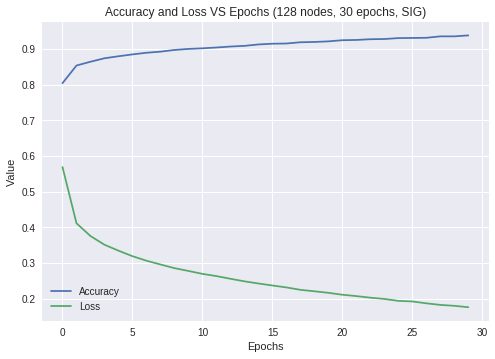

In [144]:
# Training neural network: Hidden layer with 128 nodes and 30 epochs and Sigmoid

model_128_30_SIG = Sequential()
model_128_30_SIG.add(Dense(128, activation='sigmoid', input_dim=784))
model_128_30_SIG.add(Dense(10, activation='softmax'))
model_128_30_SIG.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_128_30_SIG = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_128_30_SIG = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_128_30_SIG = model_128_30_SIG.fit(new_train_images, data_label_128_30_SIG, epochs=30)

# Testing on validation data
test_loss_128_30_SIG, test_acc_128_30_SIG = model_128_30_SIG.evaluate(validation_images, vali_label_128_30_SIG)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_128_30_SIG))
print("Test Accuracy = " + str(test_acc_128_30_SIG))
print('\n\n')

plt.figure(14)
plt.plot(training_128_30_SIG.history['acc'], label="Accuracy")
plt.plot(training_128_30_SIG.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epochs (128 nodes, 30 epochs, SIG)')
plt.legend()

Epoch 1/30
40000/40000 [==============================] - 10s 251us/step - loss: 0.5337 - acc: 0.8097
Epoch 2/30
40000/40000 [==============================] - 9s 217us/step - loss: 0.3918 - acc: 0.8611
Epoch 3/30
40000/40000 [==============================] - 9s 216us/step - loss: 0.3579 - acc: 0.8729
Epoch 4/30
40000/40000 [==============================] - 9s 216us/step - loss: 0.3427 - acc: 0.8797
Epoch 5/30
40000/40000 [==============================] - 9s 215us/step - loss: 0.3260 - acc: 0.8881
Epoch 6/30
40000/40000 [==============================] - 9s 214us/step - loss: 0.3136 - acc: 0.8915
Epoch 7/30
40000/40000 [==============================] - 9s 217us/step - loss: 0.3035 - acc: 0.8970
Epoch 8/30
40000/40000 [==============================] - 9s 215us/step - loss: 0.2960 - acc: 0.9007
Epoch 9/30
40000/40000 [==============================] - 9s 214us/step - loss: 0.2907 - acc: 0.9040
Epoch 10/30
40000/40000 [==============================] - 8s 210us/step - loss: 0.2830 - 

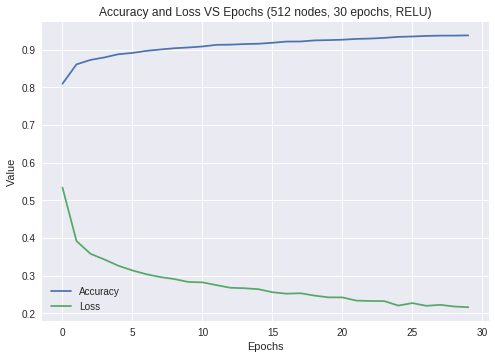

In [145]:
# Training neural network: Hidden layer with 512 nodes and 30 epochs and RELU

model_512_30_RELU = Sequential()
model_512_30_RELU.add(Dense(512, activation='relu', input_dim=784))
model_512_30_RELU.add(Dense(10, activation='softmax'))
model_512_30_RELU.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_512_30_RELU = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_512_30_RELU = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_512_30_RELU = model_512_30_RELU.fit(new_train_images, data_label_512_30_RELU, epochs=30)

# Testing on validation data
test_loss_512_30_RELU, test_acc_512_30_RELU = model_512_30_RELU.evaluate(validation_images, vali_label_512_30_RELU)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_512_30_RELU))
print("Test Accuracy = " + str(test_acc_512_30_RELU))
print('\n\n')

plt.figure(15)
plt.plot(training_512_30_RELU.history['acc'], label="Accuracy")
plt.plot(training_512_30_RELU.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epochs (512 nodes, 30 epochs, RELU)')
plt.legend()

Epoch 1/30
40000/40000 [==============================] - 10s 257us/step - loss: 0.5466 - acc: 0.8020
Epoch 2/30
40000/40000 [==============================] - 9s 218us/step - loss: 0.4081 - acc: 0.8523
Epoch 3/30
40000/40000 [==============================] - 9s 219us/step - loss: 0.3658 - acc: 0.8684
Epoch 4/30
40000/40000 [==============================] - 9s 220us/step - loss: 0.3393 - acc: 0.8769
Epoch 5/30
40000/40000 [==============================] - 9s 216us/step - loss: 0.3191 - acc: 0.8836
Epoch 6/30
40000/40000 [==============================] - 9s 218us/step - loss: 0.3006 - acc: 0.8896
Epoch 7/30
40000/40000 [==============================] - 9s 219us/step - loss: 0.2886 - acc: 0.8937
Epoch 8/30
40000/40000 [==============================] - 9s 219us/step - loss: 0.2770 - acc: 0.8989
Epoch 9/30
40000/40000 [==============================] - 9s 218us/step - loss: 0.2637 - acc: 0.9029
Epoch 10/30
40000/40000 [==============================] - 9s 218us/step - loss: 0.2542 - 

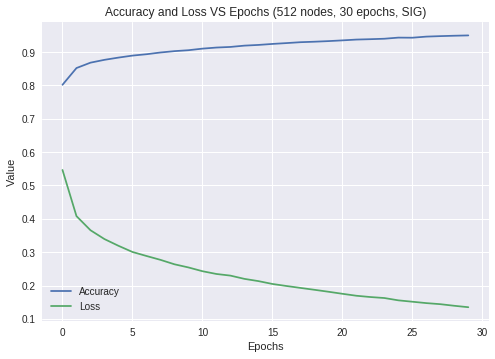

In [146]:
# Training neural network: Hidden layer with 512 nodes and 30 epochs and Sigmoid

model_512_30_SIG = Sequential()
model_512_30_SIG.add(Dense(512, activation='sigmoid', input_dim=784))
model_512_30_SIG.add(Dense(10, activation='softmax'))
model_512_30_SIG.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_512_30_SIG = keras.utils.to_categorical(new_train_label, num_classes=10)
vali_label_512_30_SIG = keras.utils.to_categorical(validation_label, num_classes=10)

# Train the model
training_512_30_SIG = model_512_30_SIG.fit(new_train_images, data_label_512_30_SIG, epochs=30)

# Testing on validation data
test_loss_512_30_SIG, test_acc_512_30_SIG = model_512_30_SIG.evaluate(validation_images, vali_label_512_30_SIG)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_512_30_SIG))
print("Test Accuracy = " + str(test_acc_512_30_SIG))
print('\n\n')

plt.figure(16)
plt.plot(training_512_30_SIG.history['acc'], label="Accuracy")
plt.plot(training_512_30_SIG.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epochs (512 nodes, 30 epochs, SIG)')
plt.legend()

### Q) Comment on the plots and comparison across the choice of activation functions

(This is done in detail in the report)

### Q) Pick the model parameters that give you the best performance, then combine your validation data with training data, retrain your network with optimum parameters and report the classication accuracy as well as the confusion matrix on the test data.

In this case the best parameters were 512 nodes, 30 epochs and the Sigmoid activation for the hidden layer.

Epoch 1/30
60000/60000 [==============================] - 15s 248us/step - loss: 0.5069 - acc: 0.8165
Epoch 2/30
60000/60000 [==============================] - 13s 221us/step - loss: 0.3851 - acc: 0.8596
Epoch 3/30
60000/60000 [==============================] - 13s 221us/step - loss: 0.3461 - acc: 0.8745
Epoch 4/30
60000/60000 [==============================] - 13s 222us/step - loss: 0.3212 - acc: 0.8840
Epoch 5/30
60000/60000 [==============================] - 13s 220us/step - loss: 0.3021 - acc: 0.8896
Epoch 6/30
60000/60000 [==============================] - 13s 223us/step - loss: 0.2879 - acc: 0.8951
Epoch 7/30
60000/60000 [==============================] - 14s 226us/step - loss: 0.2745 - acc: 0.8995
Epoch 8/30
60000/60000 [==============================] - 13s 224us/step - loss: 0.2638 - acc: 0.9042
Epoch 9/30
60000/60000 [==============================] - 14s 225us/step - loss: 0.2544 - acc: 0.9084
Epoch 10/30
60000/60000 [==============================] - 14s 226us/step - loss: 

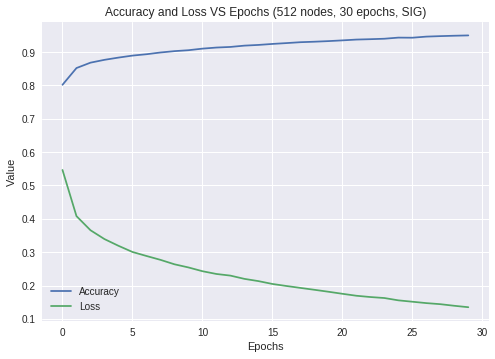

In [158]:
# Training neural network: Hidden layer with 512 nodes and 30 epochs and Sigmoid with All training data

model_512_30_SIG_Final = Sequential()
model_512_30_SIG_Final.add(Dense(512, activation='sigmoid', input_dim=784))
model_512_30_SIG_Final.add(Dense(10, activation='softmax'))
model_512_30_SIG_Final.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
data_label_512_30_SIG_Final = keras.utils.to_categorical(train_labels, num_classes=10)
vali_label_512_30_SIG_Final = keras.utils.to_categorical(test_labels, num_classes=10)

# Train the model
training_512_30_SIG_Final = model_512_30_SIG_Final.fit(train_images, data_label_512_30_SIG_Final, epochs=30)

# Testing on validation data
test_loss_512_30_SIG_Final, test_acc_512_30_SIG_Final = model_512_30_SIG_Final.evaluate(test_images, vali_label_512_30_SIG_Final)

print("\n-------- Validation Test --------")
print("Test Loss = " + str(test_loss_512_30_SIG))
print("Test Accuracy = " + str(test_acc_512_30_SIG))
print('\n\n')

plt.figure(17)
plt.plot(training_512_30_SIG.history['acc'], label="Accuracy")
plt.plot(training_512_30_SIG.history['loss'], label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss VS Epochs (512 nodes, 30 epochs, SIG)')
plt.legend()

In [165]:
prediction = model_512_30_SIG_Final.predict(test_images)
Confusion_Matrix = confusion_matrix(vali_label_512_30_SIG_Final.argmax(axis=1), prediction.argmax(axis=1))

print("\n-------- Confusion Matrix --------")
print(Confusion_Matrix)


-------- Confusion Matrix --------
[[900   2  17  18  11   2  43   0   7   0]
 [  0 982   3   8   6   0   0   0   1   0]
 [ 20   1 798   8 143   1  27   0   2   0]
 [ 40  10   9 882  43   0  10   0   6   0]
 [  0   0  55  22 905   0  16   0   2   0]
 [  0   0   0   1   0 958   0  26   1  14]
 [200   2  96  25 182   0 486   0   8   1]
 [  0   0   0   0   0   8   0 975   0  17]
 [  4   1   5   4   8   3   2   3 970   0]
 [  1   0   0   0   0   8   1  39   0 951]]
